# Used Symbols & Description:
|Symbol          |Name                                               |Description                                                                                |
|:--------------:|:-------------------------------------------------:|:-----------------------------------------------------------------------------------------:|
|$x$             |Input                                              |Data from dataset passed to the training model                                             |
|$w$             |Weight                                             |Learnable parameters                                                                       |
|$b$             |Bias                                               |Errornous assumptions in the learning process                                              |
|$z$             |Net input                                          |Accumulated sum of input values                                                            |
|$t$             |Transpose                                          |Converts a row-vector to a col-vector and vice-versa                                       |
|${\theta}$      |Threshold                                          |Chooses when to turn a projected probability or score into a class label                   |
|${\eta}$        |Learning rate (Typically a const between 0.0 & 1.0)|Determines the step size at each iteration while moving toward a minimum of a loss function|
|$ø(z)$          |Decision/Activation function                       |Helps the ANN learn complex patterns, and decides what should be passed to the next neuron |
|$y^{(i)}$       |True class label of the i'th training example      |The correct class label contained inside the dataset (Supervised Learning)                 |
|$\hat{y}^{(i)}$ |Predicted class label of the i'th training example |The predicted class label based on the highest scoring epoch                               |
|${\triangle}w_j$|Update value                                       |Decides if the weight should be negated or increased (1 or -1)                             |
|$x_j^{(i)}$     |Multiplicative factor                              |A number or symbol multiplied with a variable or an unknown quantity                       |
|$w^tx$          |Vector dot product                                 | Takes two equal-length sequences of numbers, and returns a single number                  |


# Learning model notes
1. With the perceptron rule, Rosenblatt proposed an algorithm that would automatically learn the optimal weight coefficients that would then be multiplied with the input features in order to make the decision of wether the neuron should fire or not.

2. In the context of supervised learning and classifications, such an algorithm could not be used to predict whether a new data point belongs to one class or another.

3. We can put the idea behind artificial neurons into the context of a binary classification task where we refer to our two classes as 1 (positive class) and -1 (negative class) for simplicity.

4. We can then define a decision function $ø(z)$ that takes a linear combination of certain input values, $x$, and a corresponding weight vector $w$, where $z$ is called the net-input: 
* $\mathbf{z} = w_{1},x_{1} + w_{2},x_{2} + w_{3},x_{3} + ... + w_{m} + x_{m} $

5. If the net input of the particular example $x^{(i)}$, is greater than a defined threshold, ${\theta}$, we predict class 1, and class -1 otherwise.

6. In the perceptron algorithm, the decision function, $ø(^.)$, is a variant of a unit step function:
* $ø(z) = 1 $ if $ z \ge 0, $ else $ -1$

7. For simplicity, we can bring the threshold, ${\theta}$, to the left side of the equation and define a weight-zero as $w_0 = -{\theta}$ and $x_0 = 1$ so we write $z$ in a more compact form:
* $z = w_0,x_0 + w_1,x_1 + ... + w_m,x_m = w^t x$

8. The negative threshold , or weight $w_0 = -{\theta}$ is usually called the bias unit.

9. Class label predicted by the unit step function, and the simultaneous update of each weight, $w_j$, in the weight vector, $w$, can be formally written as:
* $w_j := w_j + {\triangle}w_j$

10. The update or change value of $w_j$, which we refere to as ${\triangle}w_j = {\eta}(y^{(i)} - \hat{y})x_j^{(i)}$
* Note: All weights in the weight vector are being updatet simultaneously.

11. Example of 2-dimensional dataset update:
* ${\triangle}w_0 = {\eta}(y^{(i)} - output^{(i)})$
* ${\triangle}w_1 = {\eta}(y^{(i)} - output^{(i)})x_1^{(i)}$
* ${\triangle}w_2 = {\eta}(y^{(i)} - output^{(i)})x_2^{(i)}$

12. Example of update value with correct prediction:
* $y^{(i)} = -1, \quad {\eta}(y^{(i)} = -1, \quad {\triangle}w_j = {\eta(-1-(-1))x_j^{(i)}} = 0$
* $y^{(i)} = 1, \quad {\eta}(y^{(i)} = 1, \quad {\triangle}w_j = {\eta(1-1)x_j^{(i)}} = 0$

13. Example of update value with incorrect prediction:
* $y^{(i)} = 1, \quad {\eta}(y^{(i)} = -1, \quad {\triangle}w_j = {\eta(-1-(-1))x_j^{(i)}} = {\eta(2)x_j^{(i)}}$
* $y^{(i)} = -1, \quad {\eta}(y^{(i)} = 1, \quad {\triangle}w_j = {\eta(1-1)x_j^{(i)}} = {\eta(-2)x_j^{(i)}}$

In [92]:
%matplotlib inline

import os
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing, datasets
from sklearn.neighbors import KNeighborsClassifier

plt.style.use("ggplot")

# Load and parse Iris data set from URL

In [93]:
iris = os.path.join("https://archive.ics.uci.edu", "ml", "machine-learning-databases", "iris", "iris.data")
data = pd.read_csv(iris, header=None, encoding="utf-8")

# Process and clean the data

In [94]:
proc = preprocessing.LabelEncoder()
sepal_length = proc.fit_transform(list(data[0]))
sepal_width = proc.fit_transform(list(data[1]))
petal_length = proc.fit_transform(list(data[2]))
petal_width = proc.fit_transform(list(data[3]))
species = proc.fit_transform(list(data[4]))

predict = 4 # Species 

x = list(zip(sepal_length, sepal_width, petal_length, petal_width))
y = list(species)

# Train and predict species

In [95]:
variations = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
best = 0
worst = 100
results = []

for i in range(100):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.7)

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(x_train, y_train)
    
    accuracy = model.score(x_test, y_test)
    if accuracy > best:
        best = accuracy
    elif accuracy < worst:
        worst = accuracy
    
    prediction = model.predict(x_test)
    results.append(f"Prediction:\t{variations[prediction[i]].ljust(10)}\t\tActual: {variations[y_test[i]].ljust(10)}\t\tAccuracy: {str(round(accuracy * 100, 2)).ljust(5)}%\tData: {x_test[i]}")

In [96]:
for result in results:
    print(result)
    
print(f"\nHighest Accuracy: {round((best * 100), 2)}%")
print(f"Worst Accuracy: {round((worst * 100), 2)}%")

Prediction:	Iris-virginica		Actual: Iris-virginica		Accuracy: 95.58%	Data: (26, 10, 27, 19)
Prediction:	Iris-versicolor		Actual: Iris-versicolor		Accuracy: 95.58%	Data: (26, 10, 25, 11)
Prediction:	Iris-setosa		Actual: Iris-setosa		Accuracy: 94.69%	Data: (7, 11, 2, 1)
Prediction:	Iris-versicolor		Actual: Iris-versicolor		Accuracy: 84.07%	Data: (11, 9, 21, 11)
Prediction:	Iris-setosa		Actual: Iris-setosa		Accuracy: 87.61%	Data: (8, 17, 8, 3)
Prediction:	Iris-versicolor		Actual: Iris-versicolor		Accuracy: 92.92%	Data: (12, 5, 20, 8)
Prediction:	Iris-virginica		Actual: Iris-virginica		Accuracy: 89.38%	Data: (21, 11, 29, 19)
Prediction:	Iris-setosa		Actual: Iris-setosa		Accuracy: 94.69%	Data: (2, 2, 3, 2)
Prediction:	Iris-setosa		Actual: Iris-setosa		Accuracy: 93.81%	Data: (5, 9, 4, 2)
Prediction:	Iris-versicolor		Actual: Iris-versicolor		Accuracy: 94.69%	Data: (18, 8, 23, 10)
Prediction:	Iris-virginica		Actual: Iris-virginica		Accuracy: 98.23%	Data: (29, 9, 34, 12)
Prediction:	Iris-versic

# Graphical illustration

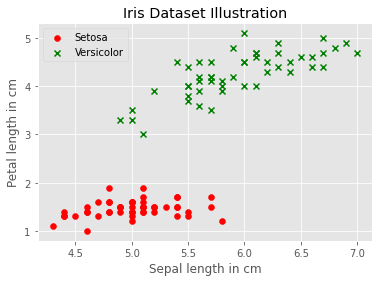

In [97]:
y = data.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1)

X = data.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="Setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="green", marker="x", label="Versicolor")

plt.title("Iris Dataset Illustration")
plt.xlabel("Sepal length in cm")
plt.ylabel("Petal length in cm")
plt.grid(True)
plt.legend()


# Perceptron training model
The perceptron learning rule was first developed by Frank Rosenblatt in 1957, based on the MCP neuron model.

![Perceptron Illustration](perceptron.jpg "Perceptron")

* Perceptron learning algorithm:
    1. Initialize the weights to 0 or a small random number.
    2. For each training example, $x^{(i)}$:
        1. Compute the output value, $\hat{y}$.
        2. Update the weights.


In [98]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rand = np.random.RandomState(self.random_state)
        self.w_ = rand.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Adaline training model (ADAptive LInear NEuron)
![Adaline Illustration](adaline.png "Adaline")

In [99]:
class Adaline(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rand = np.random.RandomState(self.random_state)
        self.w_ = rand.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# Adaline SGD training model

In [100]:
class AdalineSGD(object):
    def __init__(self, eta=0.01, n_iter=50, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
    

    def fit(self, X, y):
        """ Fit training data """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for _ in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self


    def partial_fit(self, X, y):
        """ Fit training data without reinitializing the weights """
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    

    def _shuffle(self, X, y):
        """ Shuffle training data """
        # Generating a random sequence of uniue numbers with the length of y ranging from 0 to 100, 
        # using the permutation function in np.random. These numbers can then be used as indices to shuffle our feature matrix and class label vector 
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    

    def _initialize_weights(self, m):
        """ Initialize weights to small random numbers """
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1+m)
        self.w_initialized = True 
    

    def _update_weights(self, xi, target):
        """ Apply Adaline learning rule to update the weights """
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    

    def net_input(self, X):
        """ Calculate net input """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    

    def activation(self, X):
        """ Compute linear activation """
        return X
    

    def predict(self, X):
        """ Return class label after unit step """
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# Conversion example; When a neural network reaches the peak of preciseness.

Text(0, 0.5, 'Amount of updates')

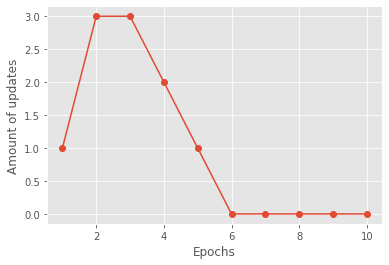

In [101]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Amount of updates")

# Convenience function to vizualize decision boundries for 2-dimensional datasets

<ipython-input-102-c5da0ced147b>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


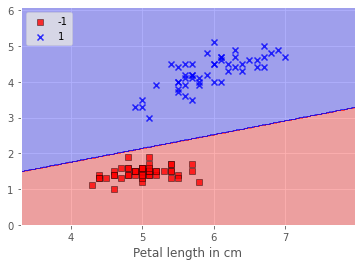

In [102]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # Plot decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Plot class example
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolors="black")

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel("Sepal length in cm")
plt.xlabel("Petal length in cm")
plt.legend(loc="upper left")
    

Text(0.5, 1.0, 'Learning rate 0.0001')

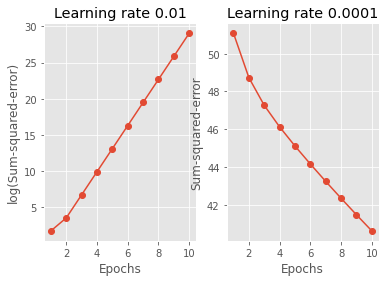

In [103]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ada = Adaline(n_iter=10, eta=0.01).fit(X, y)

ax[0].plot(range(1, len(ada.cost_) + 1), np.log10(ada.cost_), marker="o")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log(Sum-squared-error)")
ax[0].set_title("Learning rate 0.01")

ada0 = Adaline(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada0.cost_) + 1), ada0.cost_, marker="o")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Sum-squared-error")
ax[1].set_title("Learning rate 0.0001")

<ipython-input-102-c5da0ced147b>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


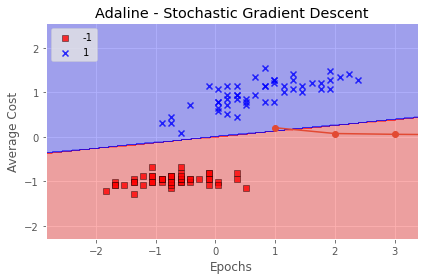

In [104]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title("Adaline - Stochastic Gradient Descent")
plt.xlabel("Sepal lenght [Standardized]")
plt.ylabel("Petal length [Standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Average Cost")
plt.tight_layout()